<a href="https://colab.research.google.com/github/gemdata0/Financial-Inclusion-in-Africa/blob/main/Financial_Inclusion_in_Africa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://zindi.africa/competitions/financial-inclusion-in-africa/data

#**Loading the data**

**Importing libraries**

In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

**loading and viewing the data**

In [ ]:
data = pd.read_csv('Train.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


**checking more information on the data**

In [ ]:
data.info()

# The data contains 13 columns and 23524 rows 
# The data types are objects and integers 
# There are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


**checking for duplicated values/rows**

In [ ]:
data.duplicated().sum()

# There are no duplicated values in the data 

0

**checking for null values**

In [ ]:
data.isnull().sum()

# There are no null values in the data 

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

**checking for outliers**

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1 
outliers = data[((data < (q1 - 1.5*iqr))|(data > (q3 + 1.5*iqr)))]
outliers.count()

# There are two columns with outliers in the data 

country                     0
year                        0
uniqueid                    0
bank_account                0
location_type               0
cellphone_access            0
household_size            381
age_of_respondent         241
gender_of_respondent        0
relationship_with_head      0
marital_status              0
education_level             0
job_type                    0
dtype: int64

**visualization of the outliers**

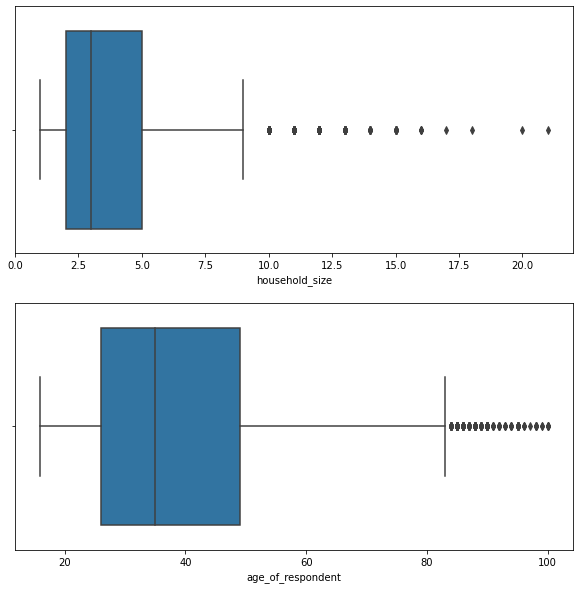

In [ ]:
types = data[['household_size', 'age_of_respondent']]
fig, axes = plt.subplots(2,1, figsize = (10,10))
for cols, ax in zip(types, axes.flatten()):
  sns.boxplot(data[cols], ax = ax);

# There are households with a high size, this is perfectly okay since there is a possibility of one household having more than 20 people.
# It seems there are people who quite old in the study. This is perfectly okay since the age of these persons is not unreasonable.

#**Data Visualization**

**target column (bank_account)**

In [ ]:
data = data.drop('uniqueid', axis = True)

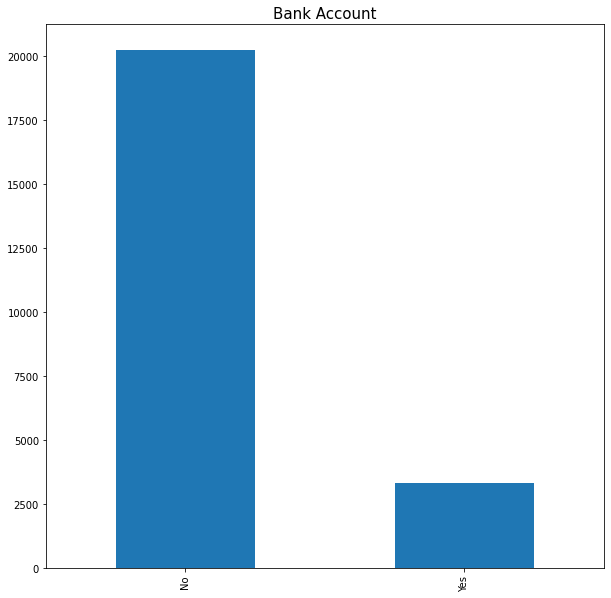

In [ ]:
fig, axes = plt.subplots(figsize = (10,10))
data['bank_account'].value_counts().plot(kind = 'bar')
plt.title('Bank Account', size = 15);

**object visualization**

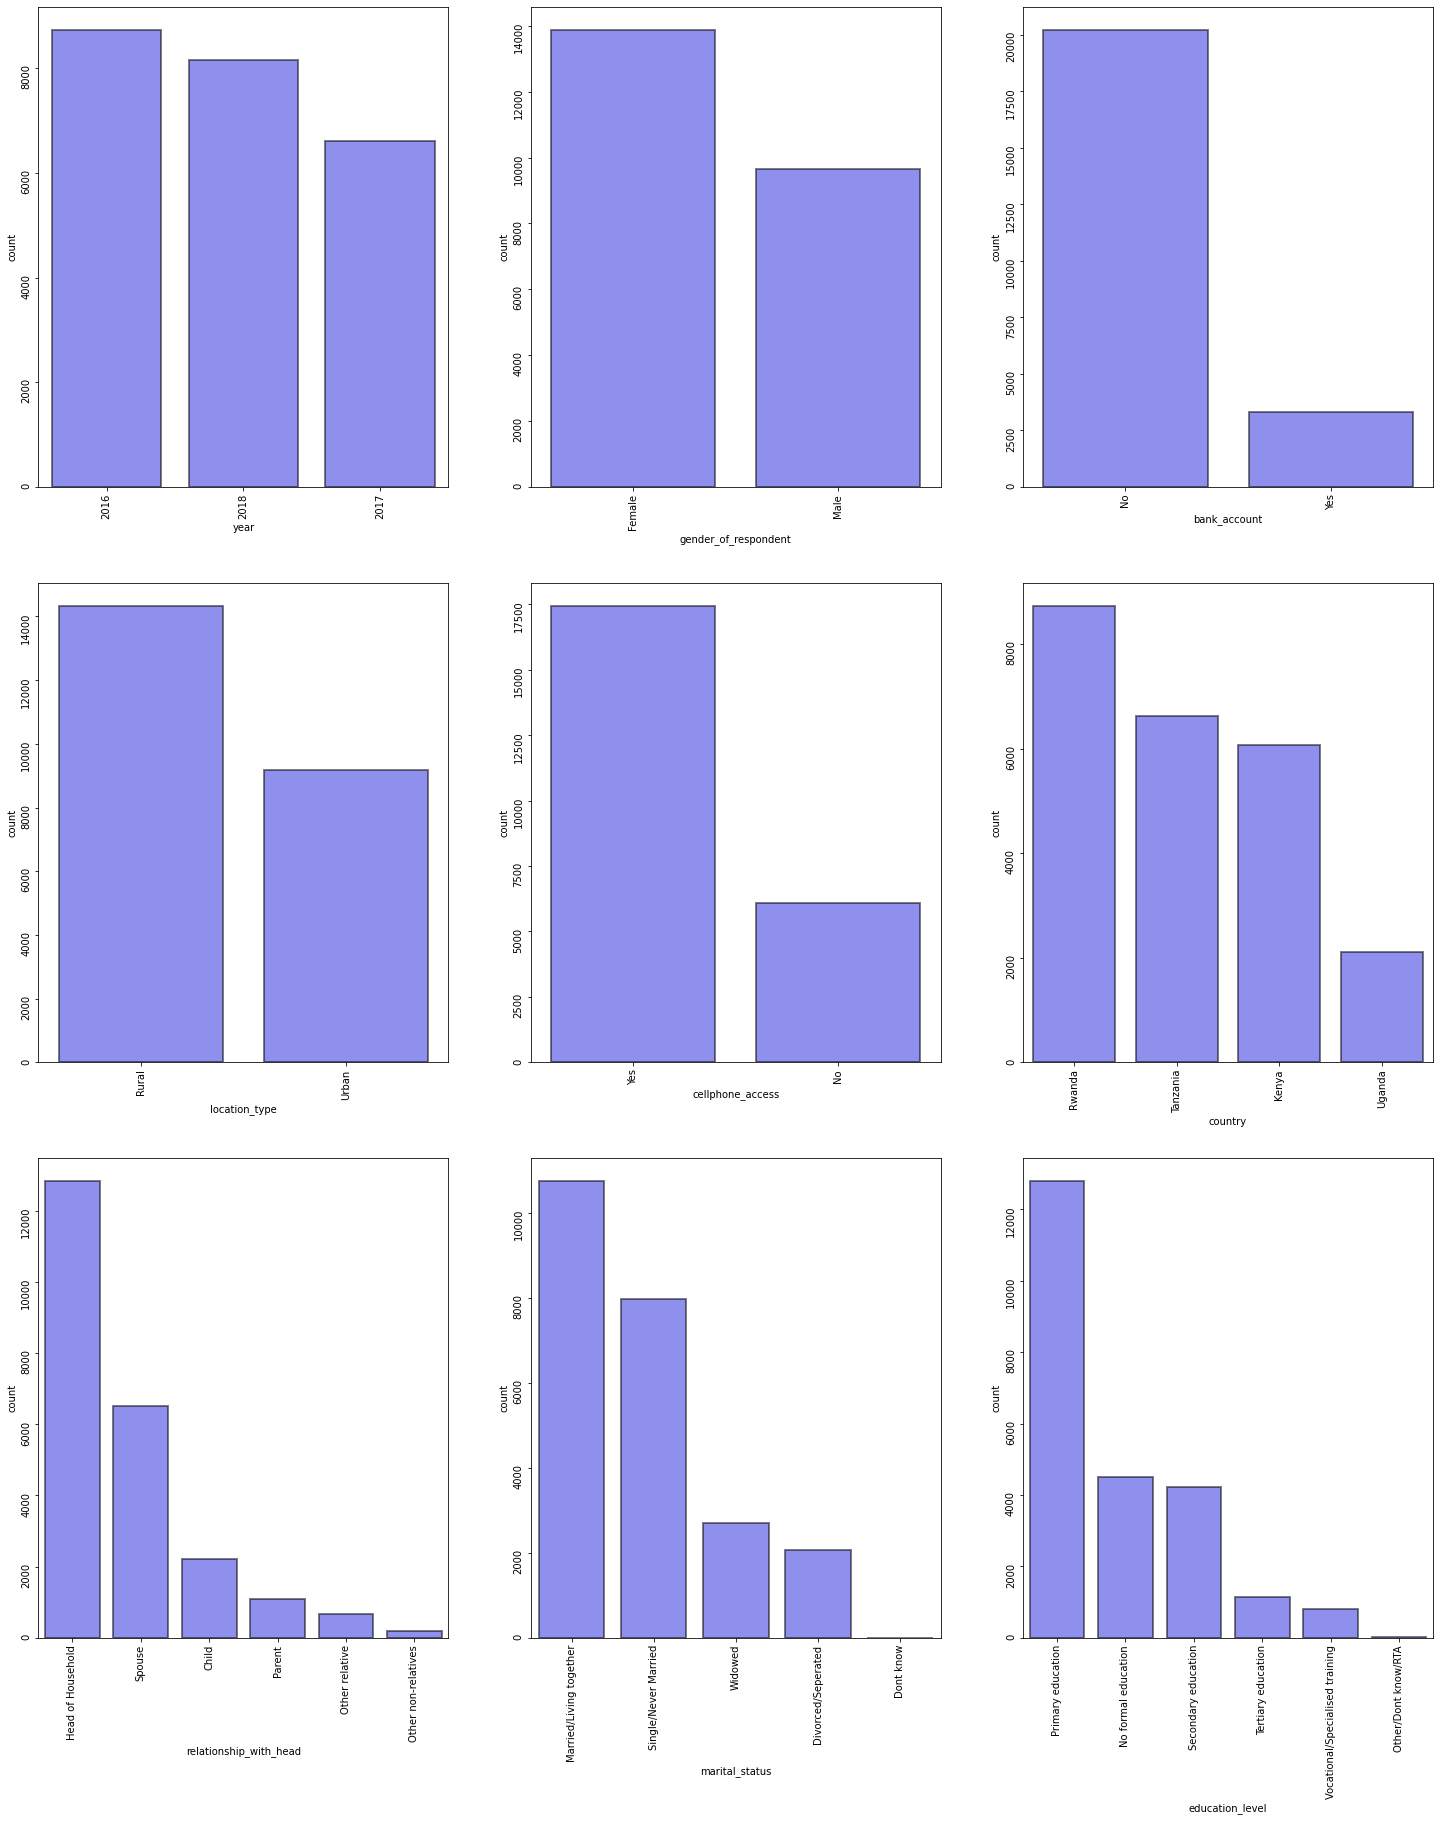

In [ ]:
types = data[['year', 'gender_of_respondent', 'bank_account', 'location_type', 'cellphone_access', 'country', 'relationship_with_head', 'marital_status', 'education_level']]
fig, axes = plt.subplots(3, 3, figsize = (25, 30))
for cols, ax in zip (types, axes.flatten()):
  sns.countplot(data[cols], ax = ax, order = data[cols].value_counts().index, color = 'blue', edgecolor = 'black', linewidth = 2, alpha = 0.5)
for axes in fig.axes:
    axes.tick_params(labelrotation = 90)

**age distribution**



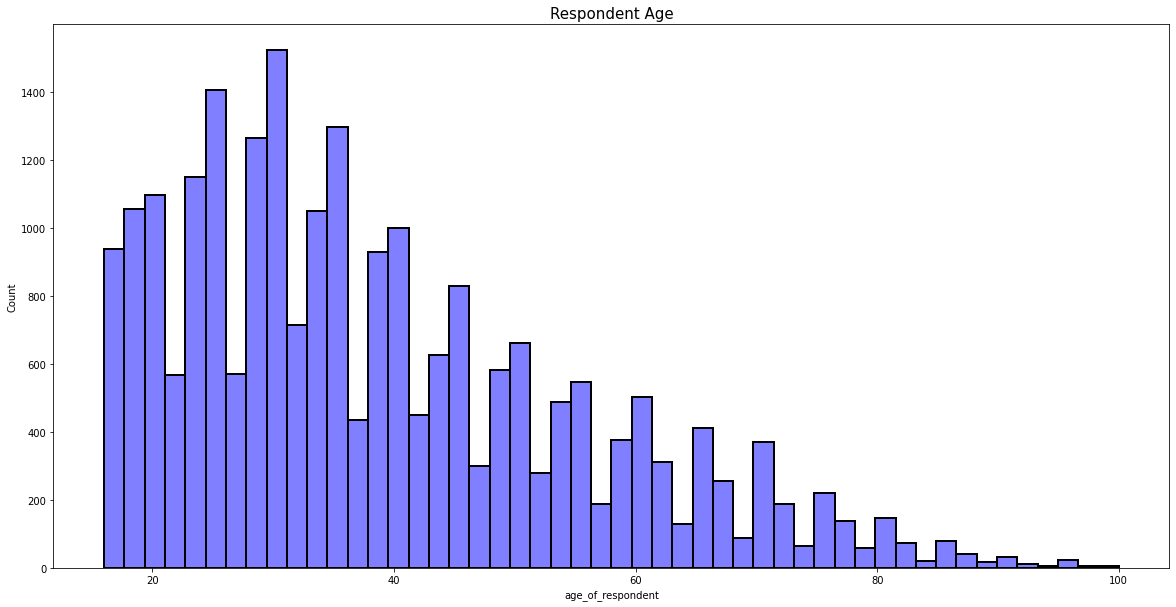

In [ ]:
fig, axes = plt.subplots(figsize = (20, 10))
sns.histplot(data['age_of_respondent'], bins = 50, color = 'blue', linewidth = 2, edgecolor = 'black', alpha = 0.5)
plt.title('Respondent Age', size = 15);

**job type**

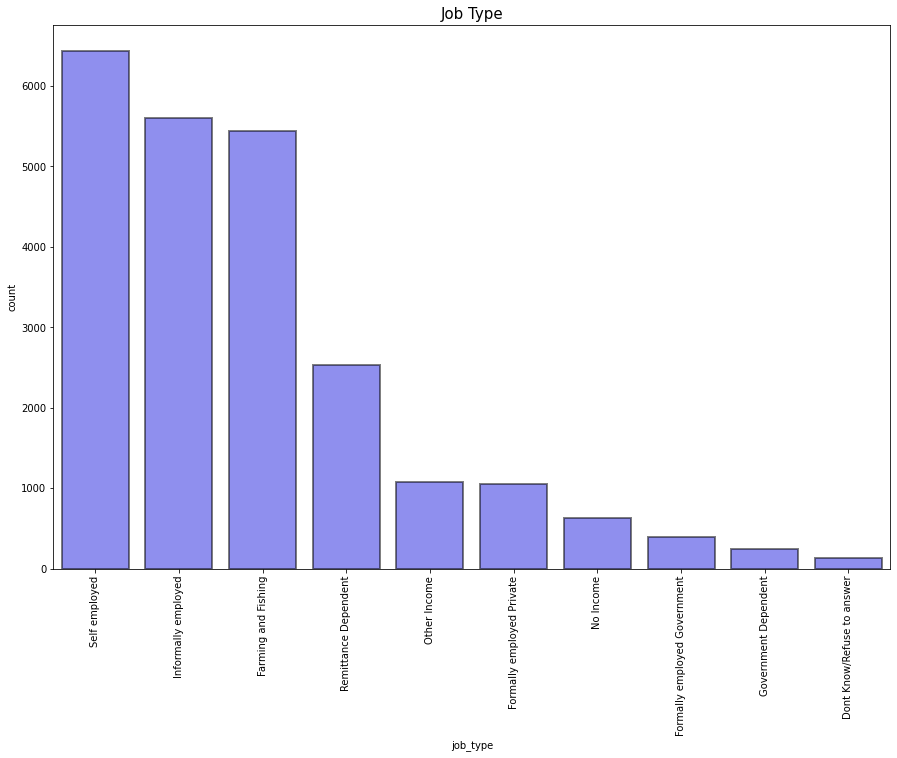

In [ ]:
fig, axes = plt.subplots(figsize = (15,10))
sns.countplot(data['job_type'], order = data['job_type'].value_counts().index ,color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black')
plt.title('Job Type', size = 15)
plt.xticks(rotation = 90);

**household size**

Text(0.5, 1.0, 'Household Size')

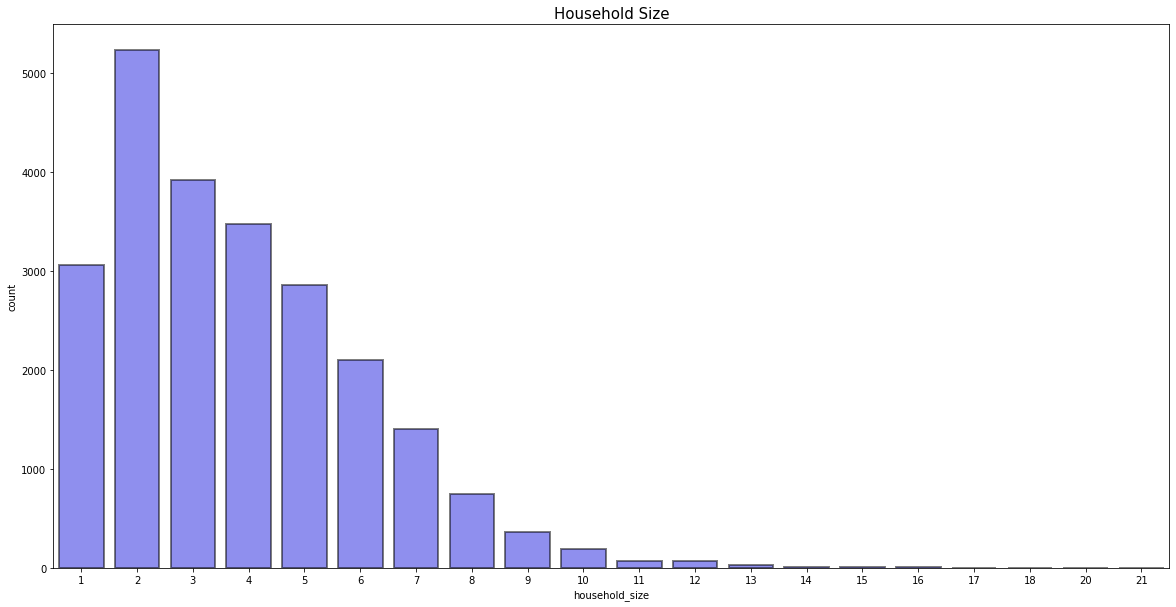

In [ ]:
fig, axes = plt.subplots(figsize = (20,10))
sns.countplot(data['household_size'], color = 'blue', alpha = 0.5, edgecolor = 'black', linewidth = 2);
plt.title('Household Size', size = 15)

**Bivariate Analysis**

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.select_dtypes('object').columns
data[cols] = data[cols].apply(le.fit_transform)
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


**correlation**

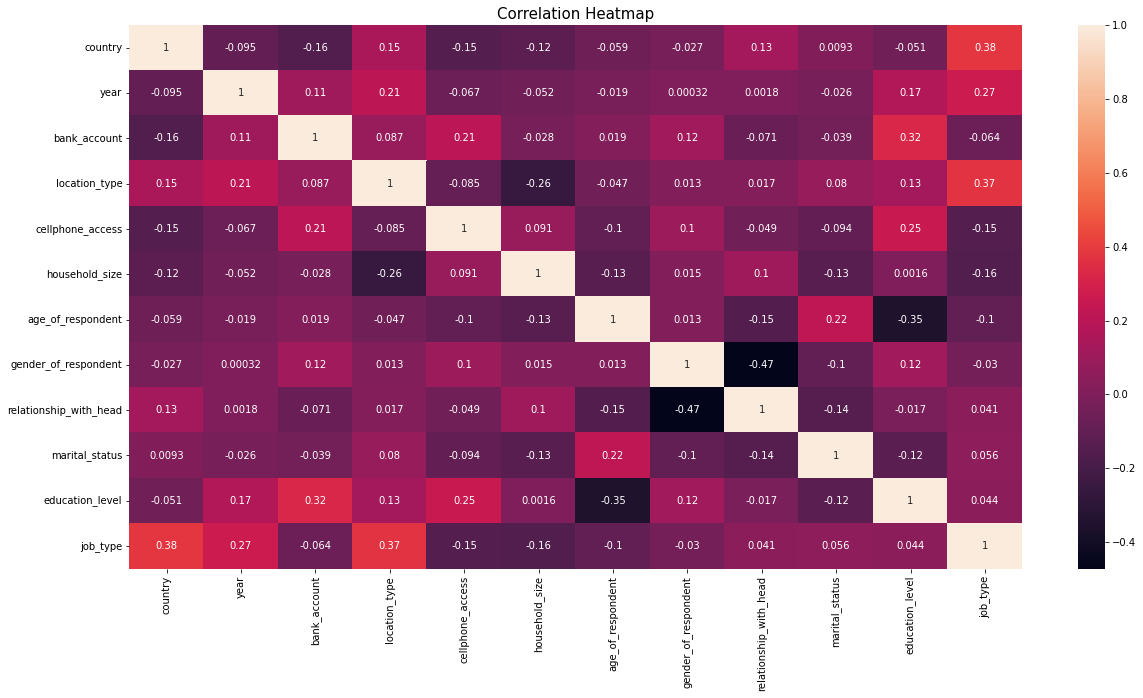

In [ ]:
fig, axes = plt.subplots(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Heatmap', size = 15);

#**Feature Selection**

**Splitting and Training the data**

In [ ]:
y = data[['bank_account']]
x = data.drop(['bank_account'], axis = True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Correcting Class Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

**Feature Selection**

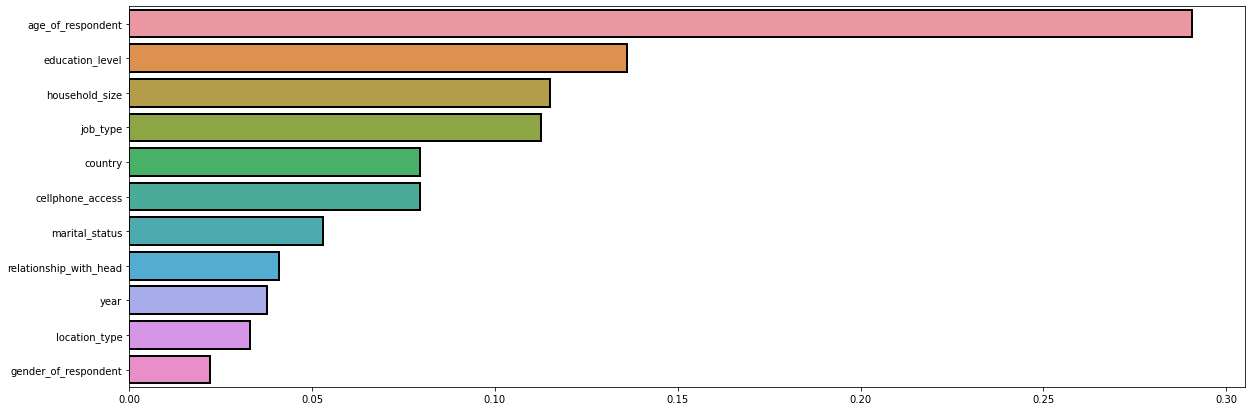

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

fig, axes = plt.subplots(figsize = (20,7))
feature_importance = pd.Series(rfc.feature_importances_, x.columns).sort_values(ascending = False)
sns.barplot(feature_importance, feature_importance.index, linewidth = 2, edgecolor = 'black');

#**Modelling**

**1. Logistic Regression (base-line model)**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      4465
           1       0.75      0.30      0.42      2593

    accuracy                           0.71      7058
   macro avg       0.72      0.62      0.61      7058
weighted avg       0.72      0.71      0.66      7058



**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5634
           1       0.55      0.40      0.46      1424

    accuracy                           0.81      7058
   macro avg       0.71      0.66      0.67      7058
weighted avg       0.80      0.81      0.80      7058



**3. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression 
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
y_pred = lgr.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      4465
           1       0.75      0.30      0.42      2593

    accuracy                           0.71      7058
   macro avg       0.72      0.62      0.61      7058
weighted avg       0.72      0.71      0.66      7058



**4. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      3385
           1       0.85      0.24      0.37      3673

    accuracy                           0.58      7058
   macro avg       0.70      0.60      0.53      7058
weighted avg       0.70      0.58      0.52      7058



From the models above, the best model is the Random Forest Classifier.

Which is what we will use further in the deployment of our model.

#**Deployment.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
7053,0
7054,0
7055,1
7056,0


In [ ]:
x_test.shape

(7058, 11)

In [ ]:
y_pred.shape

(7058, 1)

In [ ]:
x_test['y_test'] = y_test

In [ ]:
x_test.head(20)

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,y_test
4857,0,2018,0,0,9,20,0,0,3,2,8,0
22131,3,2018,0,1,5,30,1,1,2,2,0,0
22675,3,2018,0,0,6,41,0,5,2,0,9,0
5165,0,2018,0,0,5,33,0,1,3,0,1,0
16209,2,2017,0,1,5,33,1,1,3,2,9,0
8021,1,2016,0,0,3,66,0,5,2,0,1,0
13240,1,2016,0,0,2,31,1,1,0,2,1,0
9810,1,2016,0,0,7,58,0,1,4,3,5,0
6275,1,2016,0,1,3,28,1,1,2,3,1,1
12838,1,2016,0,1,8,20,1,0,3,3,8,0


In [ ]:
for i in range(10):
 print(x_test[i], y_pred[i])

KeyError: ignored

In [ ]:
y_pred.dtypes

0    int64
dtype: object

In [ ]:
y_pred.rename(columns={'0': 'y_pred'}, inplace = True)

In [ ]:
y_pred

In [ ]:
# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# fit model
model.fit(X, y)
# make predictions on the entire training dataset
yhat = model.predict(X)
# connect predictions with outputs
for i in range(10):
	print(X[i], yhat[i])

In [ ]:
y_pred

In [ ]:
test = pd.read_csv('Test.csv')
test